In [2]:
from tqdm import tqdm
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.models import resnet18
import torchvision.transforms as transforms
import numpy as np
from torchvision.transforms import Compose, Resize, ToTensor, Normalize, Lambda
import torch.nn.functional as F


In [4]:
cls = 0
saved_samples = torch.load('saved_samples/mnist-unnormalization-gradient-propagation/last_samples.pt')
saved_energies = torch.load('saved_samples/mnist-unnormalization-gradient-propagation/last_energies.pt')


torch.Size([1000, 11, 100])
torch.Size([1000, 11, 10])


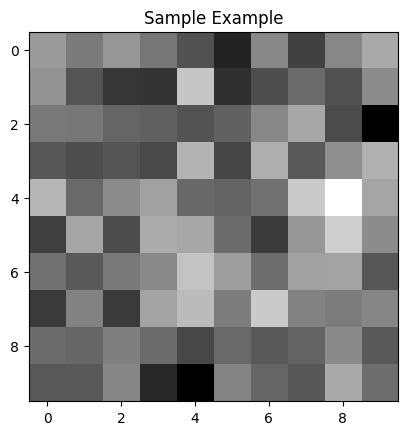

In [9]:
print(saved_samples.shape)
print(saved_energies.shape)

# Plot one example image
plt.title("Sample Example")
plt.imshow(saved_samples[-1, 0,:].reshape(10, 10, 1), cmap='gray')

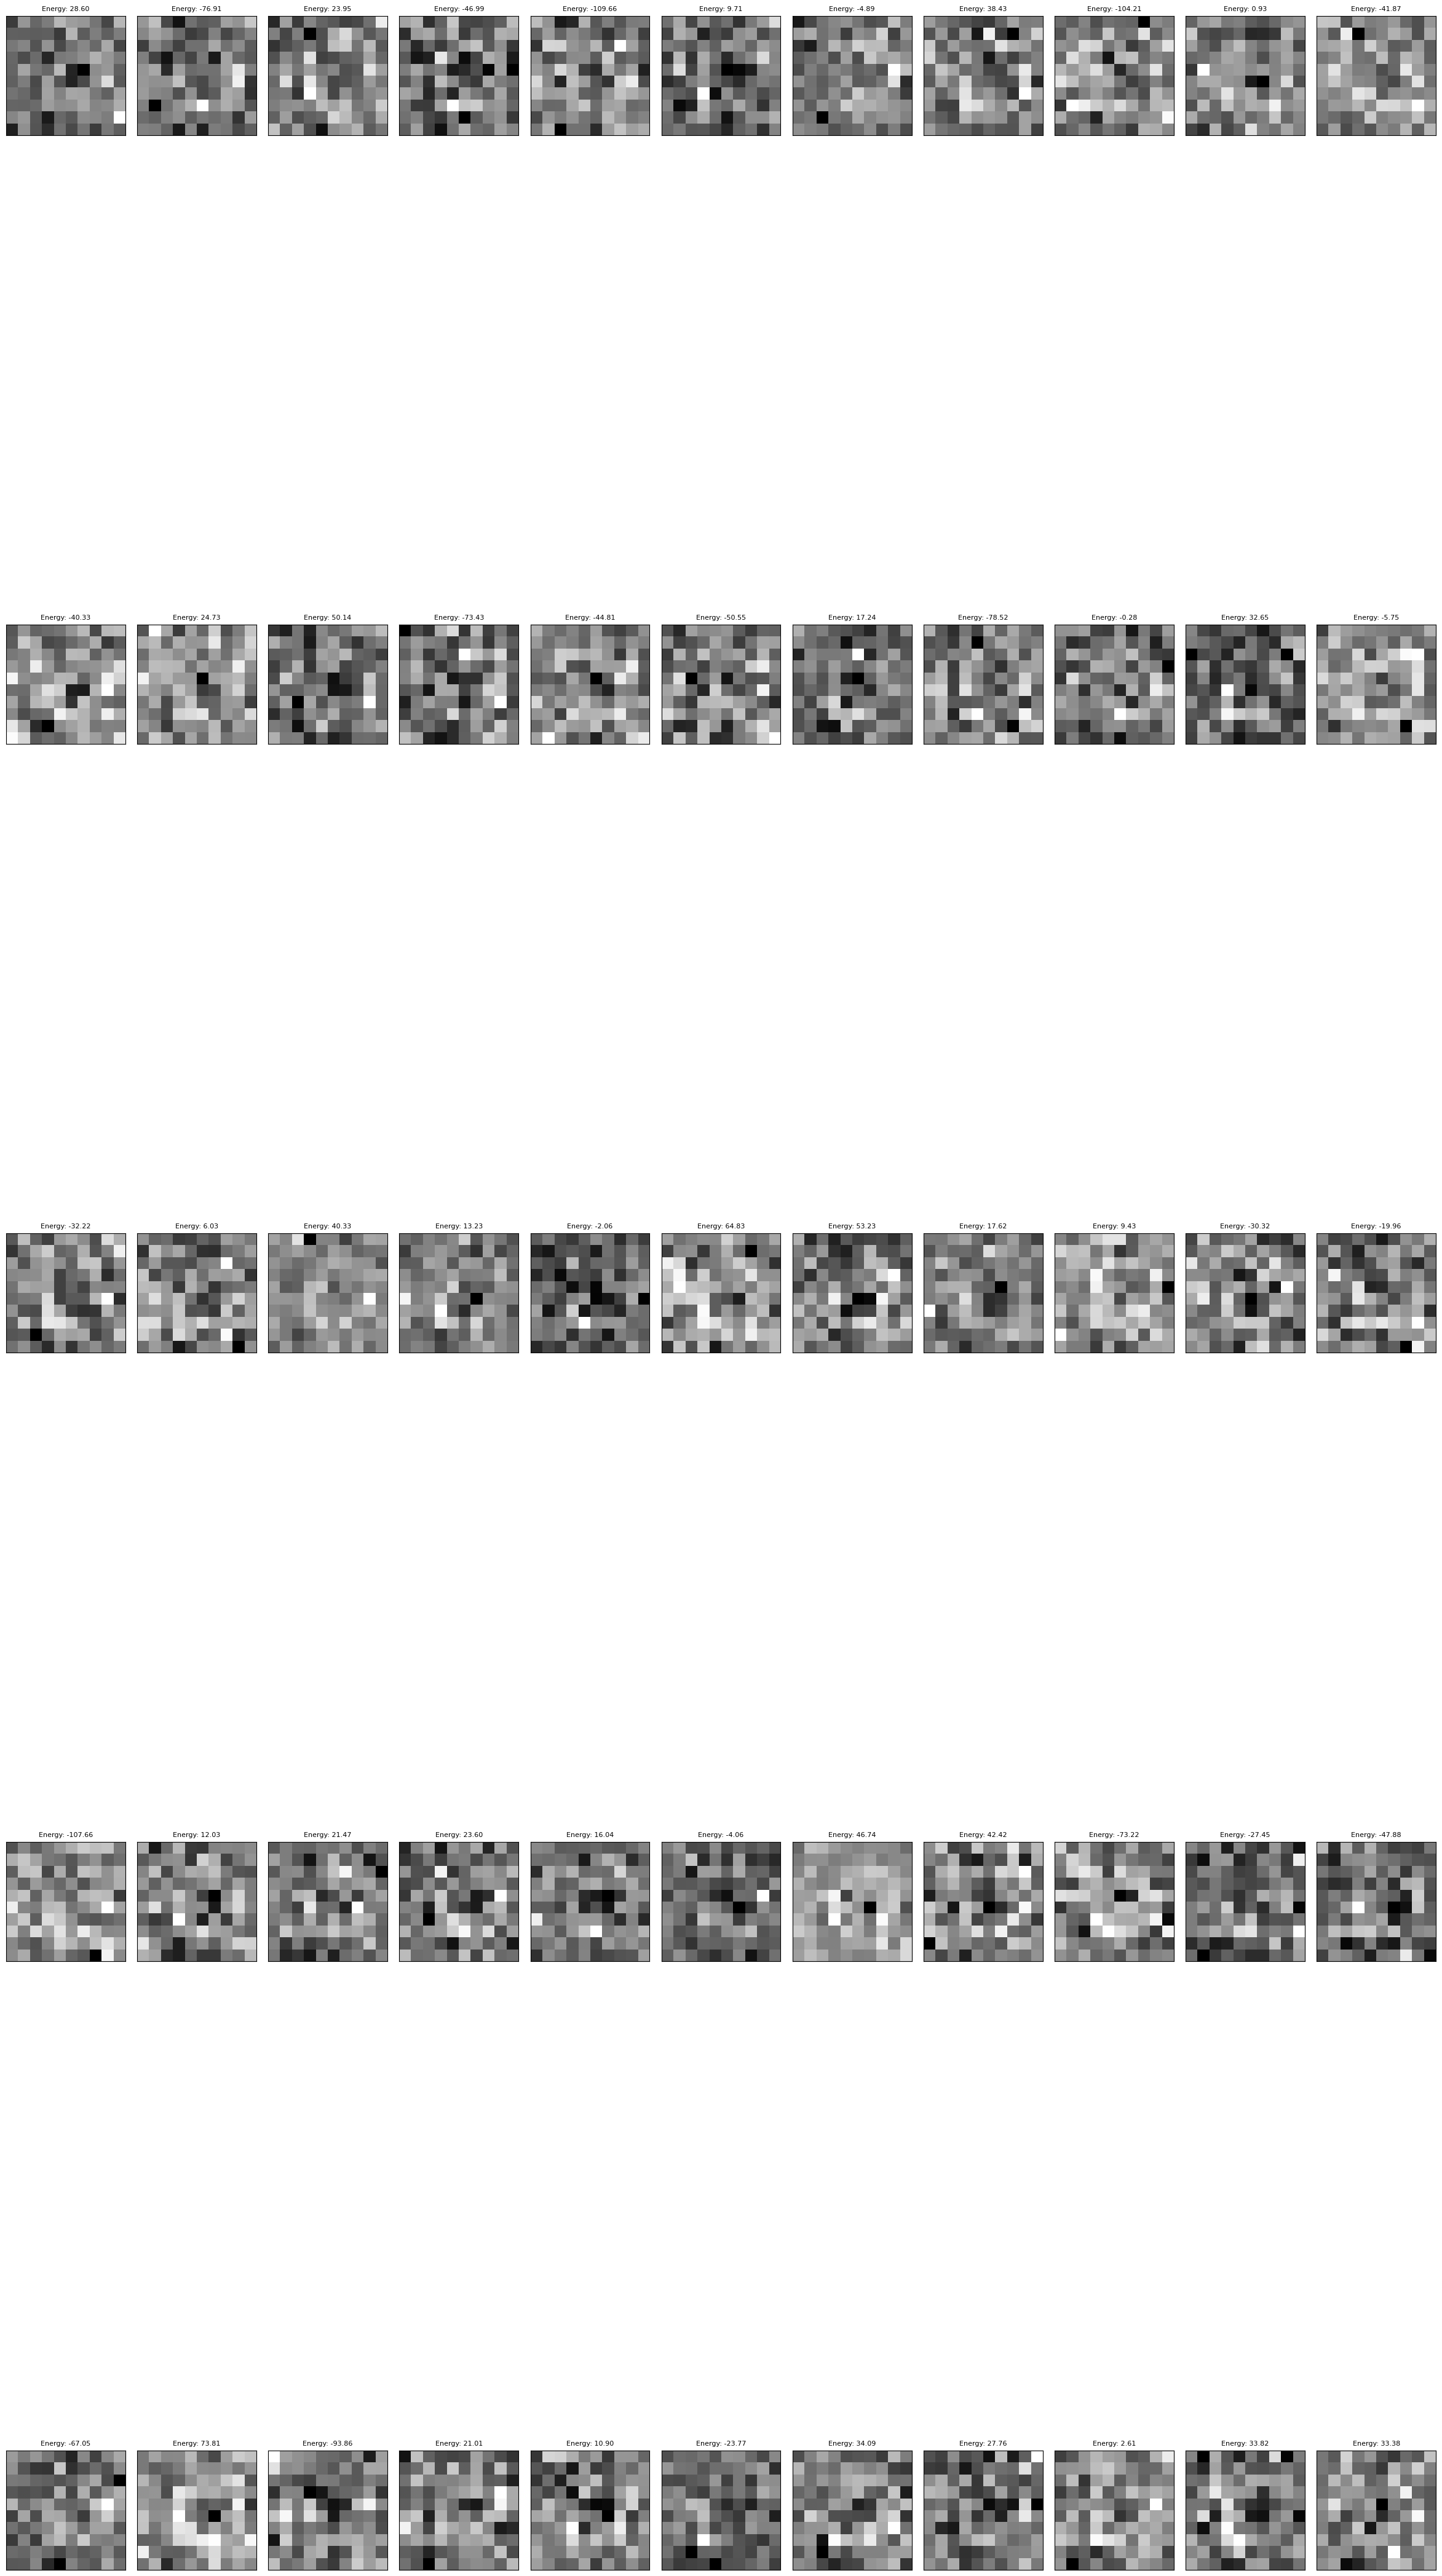

In [12]:
# Plot the 11 sample images for each of the last 5 epochs belonging to class 0
samples__ = saved_samples[995:1000]  # Simulating random data; replace with your tensor
energies__ = saved_energies[995:1000, :, cls]      # Simulating random energies; replace with your tensor

def display_images_and_energies(samples, energies, filename="output.png"):
    # Ensure the samples are reshaped into 28x28 for display
    images = samples__.view(-1, 10, 10)  # Reshape to (260, 28, 28) assuming 26*10 samples
    energies_flat = energies__.view(-1)  # Flatten the energies to match the images

    fig, axes = plt.subplots(nrows=5, ncols=11, figsize=(30, 60))  # Adjust size as needed
    fig.subplots_adjust(hspace=0.5, wspace=0.1)

    for i, ax in enumerate(axes.flat):
        # Display image
        ax.imshow(images[i], cmap='gray')
        # Title with corresponding energy
        ax.set_title(f'Energy: {energies_flat[i]:.2f}', fontdict={'fontsize': 8})
        ax.set_xticks([])
        ax.set_yticks([])

    # plt.savefig(filename, dpi=300)  # Save the figure to a file
    plt.show()
    plt.close(fig)  # Close the figure window to free up memory
    # print(f"Saved plot to {filename}")

# Call the function with your data and specify a filename
display_images_and_energies(samples__, energies__, filename="output.png")

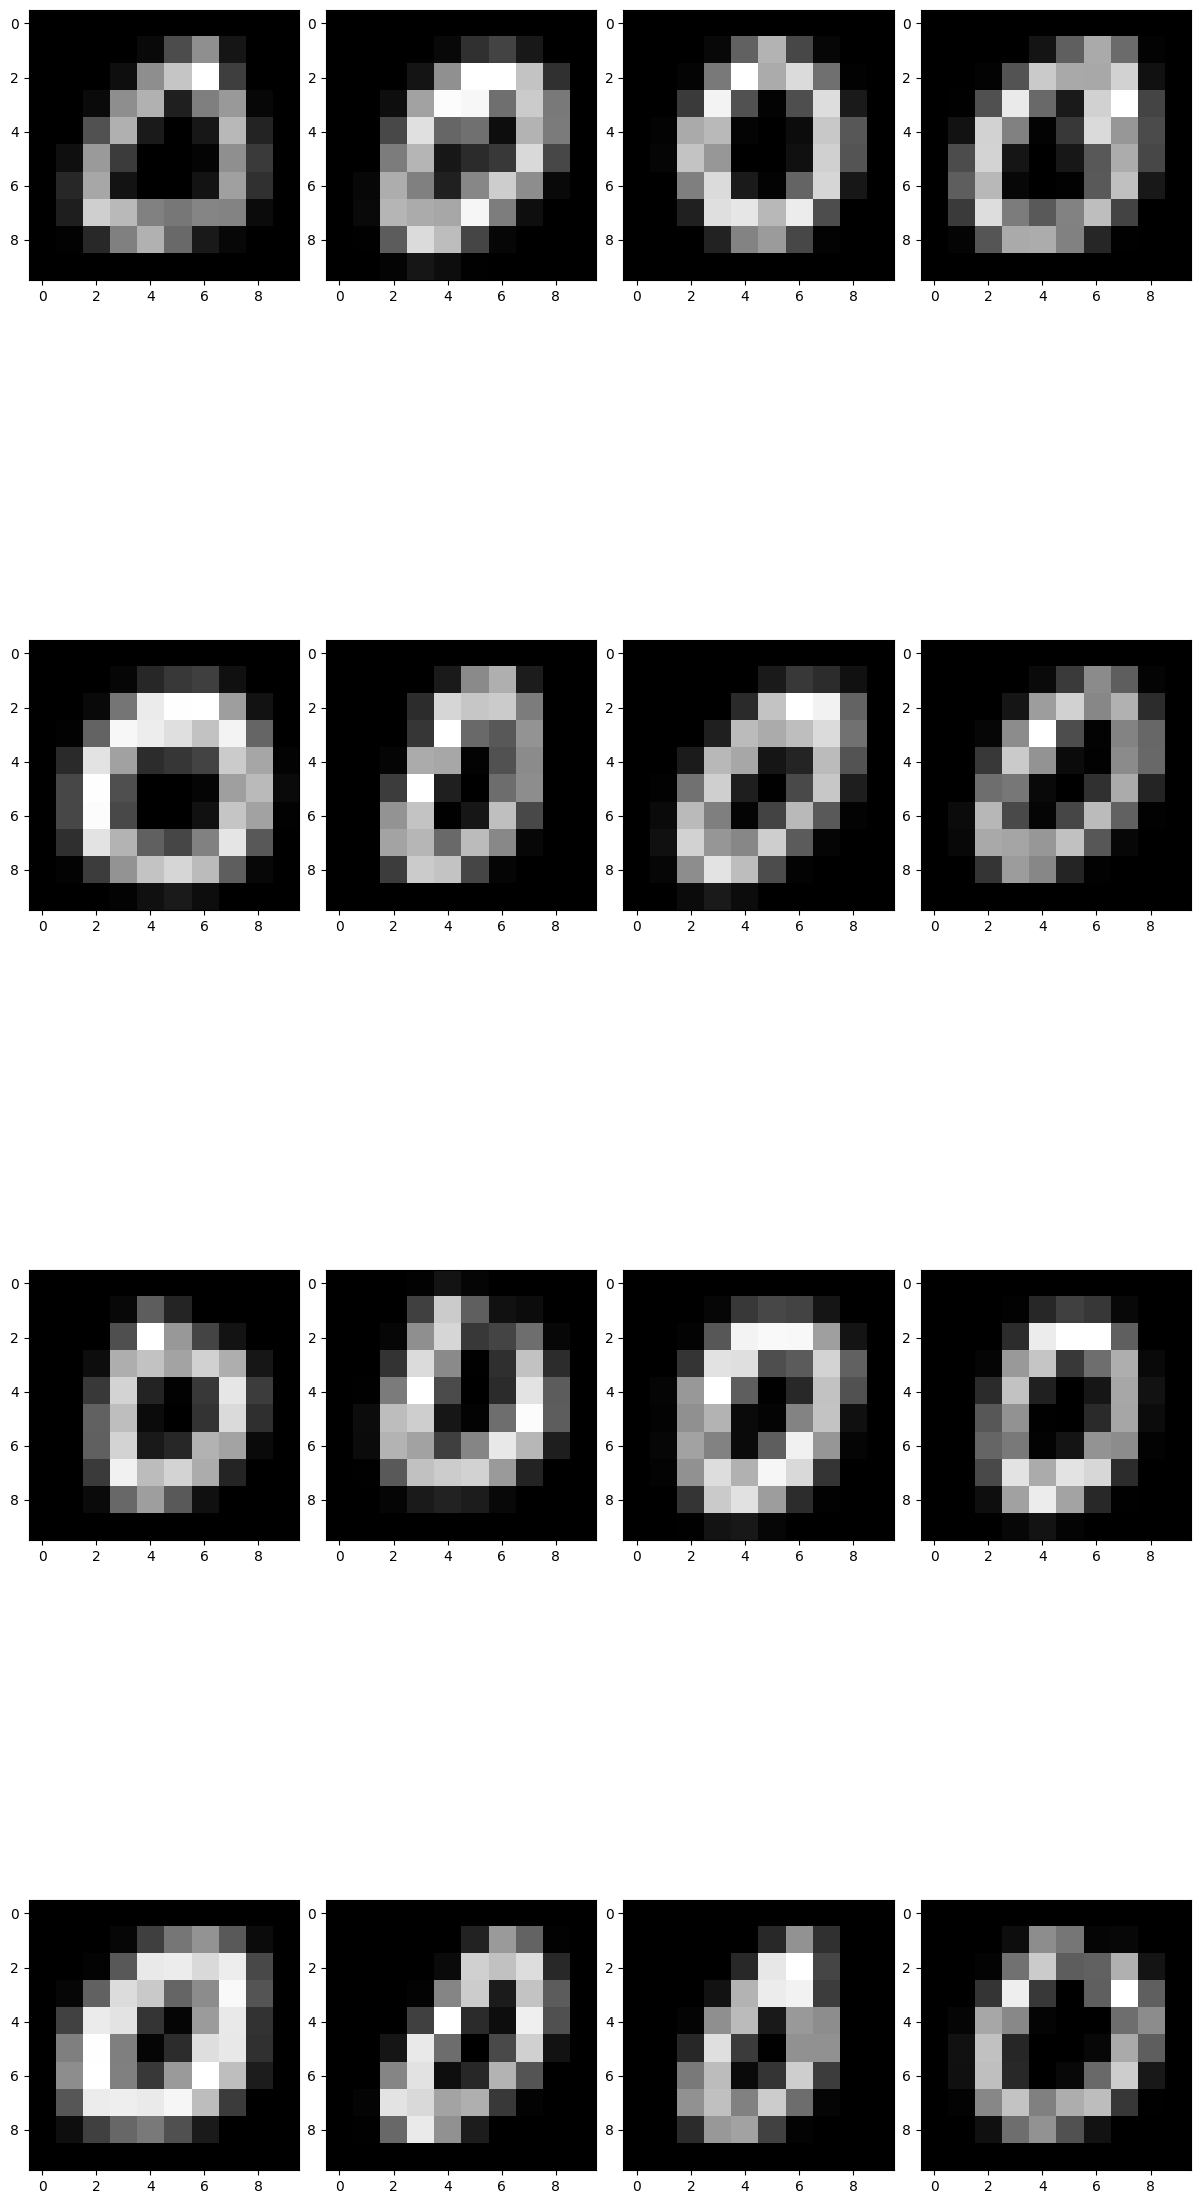

In [23]:
# plot real examples of images for comparison
shape = 10
def get_data_loader(batch_size=16):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(shape)        
    ])

    train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)

    test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

train_loader, test_loader = get_data_loader()
examples = []
for data, target in train_loader:
    examples.append(data[target == cls])
    
data = torch.cat(examples, dim=0)
data = data[:16]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 30))  # Adjust size as needed
fig.subplots_adjust(hspace=0.5, wspace=0.1)

for i, ax in enumerate(axes.flat):
    # Display image
    ax.imshow(data[i].reshape(shape, shape, 1), cmap='gray')
    # Title with corresponding energy

plt.show()

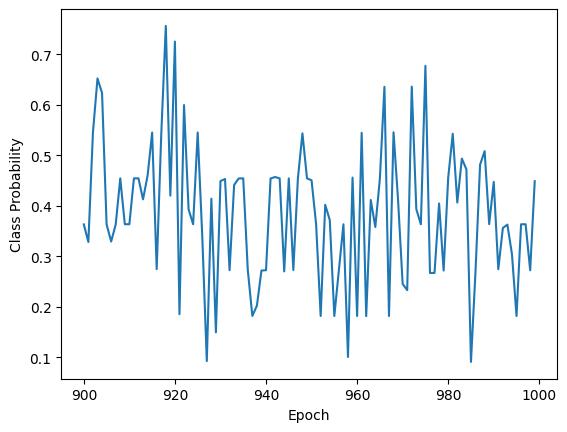

In [15]:
# plot the class likelihood of class 0 over epochs towards the end
sftmax_vectors = nn.Softmax(dim=-1)(saved_energies)
plt.xlabel('Epoch')
plt.ylabel('Class Probability')
plt.plot(np.arange(900,1000),(sftmax_vectors[900:1000, :, cls]).mean(dim=1).detach().numpy())

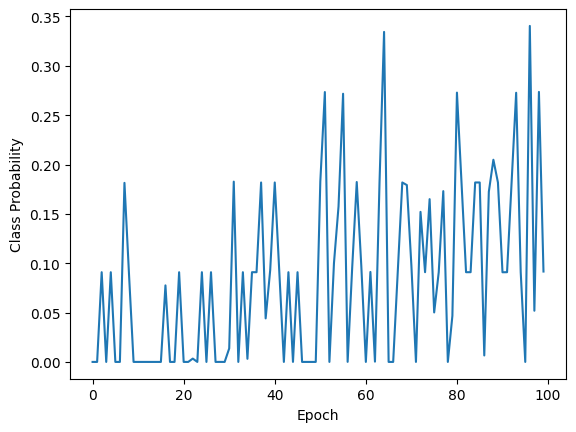

In [16]:
# plot the class likelihood of class 0 over epochs towards the beginning
sftmax_vectors = nn.Softmax(dim=-1)(saved_energies)
plt.xlabel('Epoch')
plt.ylabel('Class Probability')
plt.plot(np.arange(0,100),(sftmax_vectors[0:100, :, cls]).mean(dim=1).detach().numpy())

In [3]:
# visualizing a random 28x28 sample
samples = torch.load('saved_samples/no-unnormalization-run/last_samples.pt')

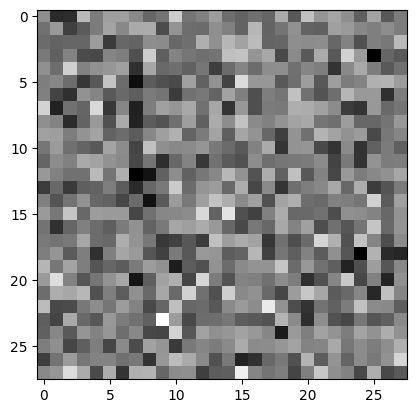

In [5]:
plt.imshow(samples[-1, 0,:].reshape(28, 28, 1), cmap='gray')